In [319]:
import math
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms
from torchvision import models
import pandas as pd
from matplotlib.patches import Circle

In [320]:
# Define a function to return a single stimulus frame (2D numpy array)
def stimfr_rectangle(xn,yn,x0,y0,size,length_ratio,angle,bgval,contrast,stim_underlay=None):
#
#  Return a numpy array that has a rectangle patch
#  in the range -1.0 to 1.0.
#
#  xn    - (int) horizontal width of returned array
#  yn    - (int) vertical height of returned array
#  x0    - (float) horizontal offset of center (pix)
#  y0    - (float) vertical offset of center (pix)
#  size  - (float) square side length (pix)
#  angle - (float) orientation (radians)
#  bgval - (float) first background value [-1.0 ... 1.0]
#  contrast - (float) [0.0 ... 1.0]

    if stim_underlay is None:#if a previous stimulus is not passed apon which to overlay
        s = np.full((yn,xn), bgval, dtype='float32')  # Fill w/ BG value
    else:#if a previous stimulus is indeed passed apon which to overlay
        s = stim_underlay#use that input simulus as the background on which to draw
    for i in range(0,xn):
        for j in range(0,yn):
            if angle < np.pi/2 and angle > 0:
                border1 = (j > (np.tan(np.pi/2 - angle)*i - x0*np.tan(np.pi/2 - angle) + y0 - size/(2*length_ratio*np.sin(angle))))
                border2 = (j < (np.tan(np.pi/2 - angle)*i - x0*np.tan(np.pi/2 - angle) + y0 + size/(2*length_ratio*np.sin(angle))))
                border3 = (j < (-(1/np.tan(np.pi/2 - angle))*i + x0*(1/np.tan(np.pi/2 - angle)) + y0 + size/(2*np.cos(angle))))
                border4 = (j > (-(1/np.tan(np.pi/2 - angle))*i + x0*(1/np.tan(np.pi/2 - angle)) + y0 - size/(2*np.cos(angle))))
            if angle == 0:
                y0_new = x0
                x0_new = y0
                border1 = (j > (y0_new - (size/2)))
                border2 = (j < (y0_new + (size/2)))
                border3 = (i < (x0_new + (size/(2*length_ratio))))
                border4 = (i > (x0_new - (size/(2*length_ratio))))
            if angle == np.pi/2:
                border1 = (i > (y0 - (size/2)))
                border2 = (i < (y0 + (size/2)))
                border3 = (j < (x0 + (size/(2*length_ratio))))
                border4 = (j > (x0 - (size/(2*length_ratio))))
            if angle == np.pi:
                y0_new = x0
                x0_new = y0
                border1 = (j > (y0_new - (size/2)))
                border2 = (j < (y0_new + (size/2)))
                border3 = (i < (x0_new + (size/(2*length_ratio))))
                border4 = (i > (x0_new - (size/(2*length_ratio))))
            if angle > np.pi/2 and angle < np.pi:
                angle_new = np.pi - angle
                border1 = (j > (np.tan(np.pi/2 - angle_new)*i - x0*np.tan(np.pi/2 - angle_new) + y0 - size/(2*np.sin(angle_new))))
                border2 = (j < (np.tan(np.pi/2 - angle_new)*i - x0*np.tan(np.pi/2 - angle_new) + y0 + size/(2*np.sin(angle_new))))
                border3 = (j < (-(1/np.tan(np.pi/2 - angle_new))*i + x0*(1/np.tan(np.pi/2 - angle_new)) + y0 + size/(2*length_ratio*np.cos(angle_new))))
                border4 = (j > (-(1/np.tan(np.pi/2 - angle_new))*i + x0*(1/np.tan(np.pi/2 - angle_new)) + y0 - size/(2*length_ratio*np.cos(angle_new))))
            if border1 and border2 and border3 and border4:
                s[j, i] = contrast
    return s

#Define a function to return a single rectanglular stimulus frame (2D numpy array)
def stimfr_square(xn,yn,x0,y0,size,angle,bgval,contrast,stim_underlay=None):
#
#  Return a numpy array that has a square patch
#  in the range -1.0 to 1.0.
#
#  xn    - (int) horizontal width of returned array
#  yn    - (int) vertical height of returned array
#  x0    - (float) horizontal offset of center (pix)
#  y0    - (float) vertical offset of center (pix)
#  size  - (float) square side length (pix)
#  angle - (float) orientation (radians)
#  bgval - (float) first background value [-1.0 ... 1.0]
#  contrast - (float) [0.0 ... 1.0]
#
    if stim_underlay is None:#if a previous stimulus is not passed apon which to overlay
        s = np.full((yn,xn), bgval, dtype='float32')  # Fill w/ BG value
    else:#if a previous stimulus is indeed passed apon which to overlay
        s = stim_underlay#use that input simulus as the background on which to draw
    for i in range(0,xn):
        for j in range(0,yn):
            if angle > np.pi/2 and angle < np.pi:
                angle_new = np.pi - angle
                border1 = (j > (np.tan(np.pi/2 - angle_new)*i - x0*np.tan(np.pi/2 - angle_new) + y0 - size/(2*np.cos(np.pi/2 - angle_new))))
                border2 = (j < (np.tan(np.pi/2 - angle_new)*i - x0*np.tan(np.pi/2 - angle_new) + y0 + size/(2*np.cos(np.pi/2 - angle_new))))
                border3 = (j < (-(1/np.tan(np.pi/2 - angle_new))*i + x0*(1/np.tan(np.pi/2 - angle_new)) + y0 + size/(2*np.sin(np.pi/2 - angle_new))))
                border4 = (j > (-(1/np.tan(np.pi/2 - angle_new))*i + x0*(1/np.tan(np.pi/2 - angle_new)) + y0 - size/(2*np.sin(np.pi/2 - angle_new))))
            if angle < np.pi/2 and angle > 0:
                border1 = (j > (np.tan(np.pi/2 - angle)*i - x0*np.tan(np.pi/2 - angle) + y0 - size/(2*np.cos(np.pi/2 - angle))))
                border2 = (j < (np.tan(np.pi/2 - angle)*i - x0*np.tan(np.pi/2 - angle) + y0 + size/(2*np.cos(np.pi/2 - angle))))
                border3 = (j < (-(1/np.tan(np.pi/2 - angle))*i + x0*(1/np.tan(np.pi/2 - angle)) + y0 + size/(2*np.sin(np.pi/2 - angle))))
                border4 = (j > (-(1/np.tan(np.pi/2 - angle))*i + x0*(1/np.tan(np.pi/2 - angle)) + y0 - size/(2*np.sin(np.pi/2 - angle))))
            if angle == 0:
                y0_new = x0
                x0_new = y0
                border1 = (j > (y0_new - (size/2)))
                border2 = (j < (y0_new + (size/2)))
                border3 = (i < (x0_new + (size/(2))))
                border4 = (i > (x0_new - (size/(2))))
            if angle == np.pi/2:
                border1 = (i > (y0 - (size/2)))
                border2 = (i < (y0 + (size/2)))
                border3 = (j < (x0 + (size/(2))))
                border4 = (j > (x0 - (size/(2))))
            if angle == np.pi:
                y0_new = x0
                x0_new = y0
                border1 = (j > (y0_new - (size/2)))
                border2 = (j < (y0_new + (size/2)))
                border3 = (i < (x0_new + (size/(2))))
                border4 = (i > (x0_new - (size/(2))))
            if border1 and border2 and border3 and border4:
                s[j, i] = contrast
    return s

def stimfr_overlap(xn,yn,x0,y0,size,length_ratio,angle,bgval,square_color,rectangle_color,overlap_degree,overlap_distance,square_first=True,isLeft=True):
    #  Return a numpy array that has a square patch and a rectangular patch overlayed
    #  in the range -1.0 to 1.0.
    #
    #  xn    - (int) horizontal width of returned array
    #  yn    - (int) vertical height of returned array
    #  x0    - (float) horizontal offset of center (pix)
    #  y0    - (float) vertical offset of center (pix)
    #  size  - (float) square side length (pix)
    #  angle - (float) orientation (radians)
    #  bgval - (float) first background value [-1.0 ... 1.0]
    #  contrast - (float) [0.0 ... 1.0]
    # length_ratio - (float) aspect ratio of the rectangle patch
    hypotenuse_dist = ((size/2) + ((size*length_ratio)/2) - overlap_distance)/np.cos(overlap_degree)#straight line distance between center point of first drawn figure to center point of second drawn
    delta_x = np.cos(overlap_degree+angle)*hypotenuse_dist#how far in x direction from first figure center point to the second figure center point
    delta_y = np.sin(overlap_degree+angle)*hypotenuse_dist#how far in y direction from first figure center point to the second figure center point
    if square_first and isLeft:
        s = stimfr_square(xn,yn,x0,y0,size,angle,bgval,square_color)
        x0_rec = x0 + delta_x#center x coordinate of second figure
        y0_rec = y0 - delta_y#center y coordinate of second figure
        s_new = stimfr_rectangle(xn,xn,x0_rec,y0_rec,size,length_ratio,angle,bgval,rectangle_color,s)
    elif square_first and (not isLeft):
        s = stimfr_square(xn,yn,x0,y0,size,angle,bgval,square_color)
        x0_rec = x0 - delta_x#center x coordinate of second figure
        y0_rec = y0 + delta_y#center y coordinate of second figure
        s_new = stimfr_rectangle(xn,xn,x0_rec,y0_rec,size,length_ratio,angle,bgval,rectangle_color,s)
    elif (not square_first) and isLeft:
        s = stimfr_rectangle(xn,xn,x0,y0,size,length_ratio,angle,bgval,rectangle_color)
        x0_sq = x0 + delta_x#center x coordinate of second figure
        y0_sq = y0 - delta_y#center y coordinate of second figure
        s_new = stimfr_square(xn,yn,x0_sq,y0_sq,size,angle,bgval,square_color,s)
    else:
        s = stimfr_rectangle(xn,xn,x0,y0,size,length_ratio,angle,bgval,rectangle_color)
        x0_sq = x0 - delta_x#center x coordinate of second figure
        y0_sq = y0 + delta_y#center y coordinate of second figure
        s_new = stimfr_square(xn,yn,x0_sq,y0_sq,size,angle,bgval,square_color,s)
    return s_new

def create_stim_set(RF_x, RF_y, xn, yn, size, angle, bgval = 0.35,
                    length_ratio = 0.75, overlap_degree = np.pi/8, overlap_distance = size/8):

    edge_dist_sq = size/2#distance to figure edge simple square stimulus
    delta_i_sq = np.sin(angle)*edge_dist_sq#pixel distance in x direction to RF center
    delta_j_sq = np.cos(angle)*edge_dist_sq#pixel distance in y direction to RF center

    #square left 1A, 1C
    x0_1AC = RF_x - delta_i_sq#x location of square such that the border of interest is in the center
    y0_1AC = RF_y + delta_j_sq#y location of square such that the border of interest is in the center

    #square right 1B, 1D
    x0_1BD = RF_x + delta_i_sq#x location of square such that the border of interest is in the center
    y0_1BD = RF_y - delta_j_sq#y location of square such that the border of interest is in the center

    contrast = bgval
    s_1A = stimfr_square(xn,yn,x0_1AC,y0_1AC,size,angle,0.0,contrast)
    s_1D = stimfr_square(xn,yn,x0_1BD,y0_1BD,size,angle,0.0,contrast)

    contrast = 0.0
    s_1B = stimfr_square(xn,yn,x0_1BD,y0_1BD,size,angle,bgval,contrast)
    s_1C = stimfr_square(xn,yn,x0_1AC,y0_1AC,size,angle,bgval,contrast)
    
    #where does the RF sit along the figure border based on the offset degree?
    #how far apart are the center points of both drawn figures
    hypotenuse_dist = ((size/2) + ((size*length_ratio)/2) - overlap_distance)/np.cos(overlap_degree)#straight line distance between center point of first drawn figure to center point of second drawn
    border_length = size - hypotenuse_dist*np.sin(overlap_degree)
    border_piece =  (size/2) - ((border_length)/2)
    theta_RF = np.arctan(border_piece/(size/2))

    edge_dist_sr = np.sqrt(((size/2)**2) + (border_piece**2))#distance to overlapped figure edge
    delta_i_sr = np.cos(angle + theta_RF)*edge_dist_sr#pixel distance in x direction to RF center
    delta_j_sr = np.sin(angle + theta_RF)*edge_dist_sr#pixel distance in y direction to RF center

    delta_x = np.cos(overlap_degree+angle)*hypotenuse_dist#how far in x direction from first figure center point to the second figure center point
    delta_y = np.sin(overlap_degree+angle)*hypotenuse_dist#how far in y direction from first figure center point to the second figure center point
    
    #center for 2A, 2A (square left)
    x0_2AC_sq = RF_x - delta_i_sr#x location of square such that the border of interest is in the center
    y0_2AC_sq = RF_y + delta_j_sr#y location of square such that the border of interest is in the center
    x0_2AC = x0_2AC_sq + delta_x#center x coordinate of first drawn figure (rectangle)
    y0_2AC = y0_2AC_sq - delta_y#center y coordinate of first drawn figure (rectangle)

    #center for 2B, 2D (square right)
    x0_2BD_sq = RF_x + delta_i_sr#x location of square such that the border of interest is in the center
    y0_2BD_sq = RF_y - delta_j_sr#y location of square such that the border of interest is in the center
    x0_2BD = x0_2BD_sq - delta_x#center x coordinate of first drawn figure (rectangle)
    y0_2BD = y0_2BD_sq + delta_y#center y coordinate of first drawn figure (rectangle)

    #create stimulus for 2A
    square_color = 1.0
    rectangle_color = 0.0
    s_2A = stimfr_overlap(xn,yn,x0_2AC,y0_2AC,size,length_ratio,angle,bgval,square_color,rectangle_color,overlap_degree,overlap_distance,square_first=False,isLeft=False)

    #create stimulus for 2B
    square_color = 0.0
    rectangle_color = 1.0
    s_2B = stimfr_overlap(xn,yn,x0_2BD,y0_2BD,size,length_ratio,angle,bgval,square_color,rectangle_color,overlap_degree,overlap_distance,square_first=False)

    #create stimulus for 2C
    square_color = 0.0
    rectangle_color = 1.0
    s_2C = stimfr_overlap(xn,yn,x0_2AC,y0_2AC,size,length_ratio,angle,bgval,square_color,rectangle_color,overlap_degree,overlap_distance,square_first=False,isLeft=False)

    #create stimulus for 2D
    square_color = 1.0
    rectangle_color = 0.0
    s_2D = stimfr_overlap(xn,yn,x0_2BD,y0_2BD,size,length_ratio,angle,bgval,square_color,rectangle_color,overlap_degree,overlap_distance,square_first=False)
    
    stims = [s_1A, s_1B, s_1C, s_1D, s_2A, s_2B, s_2C, s_2D]
    return stims

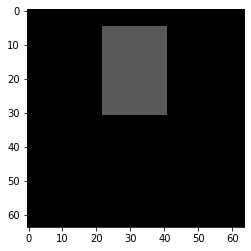

In [321]:
# Create and plot one example stimulus frame for figure 1 stimulus
xn = 64
yn = 64
size = 20.0
angle = np.pi/2
#angle = 0
length_ratio = 0.75 #(height:width)

RF_x = 31#where to center the border of interest x coord
RF_y = 31#where to center the border of interest y coord

edge_dist = size/(2*length_ratio)#distance to figure edge
delta_i = np.sin(angle)*edge_dist#pixel distance in x direction to RF center
delta_j = np.cos(angle)*edge_dist#pixel distance in y direction to RF center

#square left 1A, 1C
x0_1AC = RF_x - delta_i#x location of square such that the border of interest is in the center
y0_1AC = RF_y + delta_j#y location of square such that the border of interest is in the center

#square right 1B, 1D
x0_1BD = RF_x + delta_i#x location of square such that the border of interest is in the center
y0_1BD = RF_y - delta_j#y location of square such that the border of interest is in the center

bgval = 0.0
contrast = 0.35

rect_test = stimfr_rectangle(xn,yn,x0_1AC,y0_1AC,size,length_ratio, angle,bgval,contrast)

plt.imshow(rect_test, cmap='gray', vmin=0, vmax=1)
plt.show()

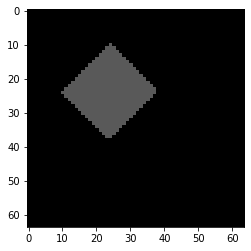

In [322]:
# Create and plot one example stimulus frame for figure 1 stimulus
xn = 64
yn = 64
size = 20.0
angle = 3*np.pi/4

RF_x = 31#where to center the border of interest x coord
RF_y = 31#where to center the border of interest y coord

edge_dist = size/2#distance to figure edge
delta_i = np.sin(angle)*edge_dist#pixel distance in x direction to RF center
delta_j = np.cos(angle)*edge_dist#pixel distance in y direction to RF center

#square left 1A, 1C
x0_1AC = RF_x - delta_i#x location of square such that the border of interest is in the center
y0_1AC = RF_y + delta_j#y location of square such that the border of interest is in the center

#square right 1B, 1D
x0_1BD = RF_x + delta_i#x location of square such that the border of interest is in the center
y0_1BD = RF_y - delta_j#y location of square such that the border of interest is in the center

bgval = 0.0
contrast = 0.35
s_1A = stimfr_square(xn,yn,x0_1AC,y0_1AC,size,angle,bgval,contrast)
s_1D = stimfr_square(xn,yn,x0_1BD,y0_1BD,size,angle,bgval,contrast)

bgval = 0.35
contrast = 0.0
s_1B = stimfr_square(xn,yn,x0_1BD,y0_1BD,size,angle,bgval,contrast)
s_1C = stimfr_square(xn,yn,x0_1AC,y0_1AC,size,angle,bgval,contrast)

plt.imshow(s_1A, cmap='gray', vmin=0, vmax=1)
plt.show()

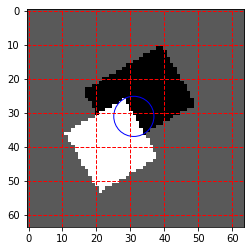

In [323]:
#Create and plot example square and rectangular overlap stimulus frame, figure 2 stimulus
#Global constants
xn = 64
yn = 64
size = 20.0
angle = np.pi/6
bgval = 0.35
length_ratio = 0.75 #(height:width)
overlap_degree = np.pi/6
overlap_distance = size/6

RF_x = 31#where to center the border of interest x coord
RF_y = 31#where to center the border of interest y coord

#how far apart are the center points of both drawn figures
hypotenuse_dist = ((size/2) + ((size*length_ratio)/2) - overlap_distance)/np.cos(overlap_degree)#straight line distance between center point of first drawn figure to center point of second drawn
delta_x = np.cos(overlap_degree+angle)*hypotenuse_dist#how far in x direction from first figure center point to the second figure center point
delta_y = np.sin(overlap_degree+angle)*hypotenuse_dist#how far in y direction from first figure center point to the second figure center point

#where does the RF sit along the figure border based on the offset degree?
border_length = size - hypotenuse_dist*np.sin(overlap_degree)
border_piece =  (size/2) - ((border_length)/2)
theta_RF = np.arctan(border_piece/(size/2))

edge_dist = np.sqrt(((size/2)**2) + (border_piece**2))#distance to overlapped figure edge
delta_i = np.cos(angle + theta_RF)*edge_dist#pixel distance in x direction to RF center
delta_j = np.sin(angle + theta_RF)*edge_dist#pixel distance in y direction to RF center

#center for 2A, 2A (square left)
x0_2AC_sq = RF_x - delta_i#x location of square such that the border of interest is in the center
y0_2AC_sq = RF_y + delta_j#y location of square such that the border of interest is in the center
x0_2AC = x0_2AC_sq + delta_x#center x coordinate of first drawn figure (rectangle)
y0_2AC = y0_2AC_sq - delta_y#center y coordinate of first drawn figure (rectangle)

#center for 2B, 2D (square right)
x0_2BD_sq = RF_x + delta_i#x location of square such that the border of interest is in the center
y0_2BD_sq = RF_y - delta_j#y location of square such that the border of interest is in the center
x0_2BD = x0_2BD_sq - delta_x#center x coordinate of first drawn figure (rectangle)
y0_2BD = y0_2BD_sq + delta_y#center y coordinate of first drawn figure (rectangle)

#create stimulus for 2A
square_color = 1.0
rectangle_color = 0.0
s_2A = stimfr_overlap(xn,yn,x0_2AC,y0_2AC,size,length_ratio,angle,bgval,square_color,rectangle_color,overlap_degree,overlap_distance,square_first=False,isLeft=False)

#create stimulus for 2B
square_color = 0.0
rectangle_color = 1.0
s_2B = stimfr_overlap(xn,yn,x0_2BD,y0_2BD,size,length_ratio,angle,bgval,square_color,rectangle_color,overlap_degree,overlap_distance,square_first=False)

#create stimulus for 2C
square_color = 0.0
rectangle_color = 1.0
s_2C = stimfr_overlap(xn,yn,x0_2AC,y0_2AC,size,length_ratio,angle,bgval,square_color,rectangle_color,overlap_degree,overlap_distance,square_first=False,isLeft=False)

#create stimulus for 2D
square_color = 1.0
rectangle_color = 0.0
s_2D = stimfr_overlap(xn,yn,x0_2BD,y0_2BD,size,length_ratio,angle,bgval,square_color,rectangle_color,overlap_degree,overlap_distance,square_first=False)

im = plt.imshow(s_2A, cmap='gray', vmin=0, vmax=1);
ax = plt.gca();
ax.grid(color='r', linestyle='--', linewidth=1)


diam = size - hypotenuse_dist*np.sin(overlap_degree)
circ = Circle((RF_x,RF_y),diam/2, ec='b',fill=False)
ax.add_patch(circ)

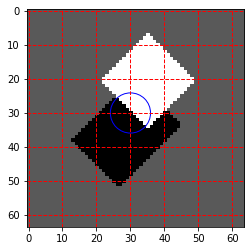

In [327]:
#Global constants
xn = 64
yn = 64
size = 20.0
angle = np.pi/4

RF_x = 30#where to center the border of interest x coord
RF_y = 30#where to center the border of interest y coord

stimuli = create_stim_set(RF_x, RF_y, xn, yn, size, angle)
diam = size - hypotenuse_dist*np.sin(overlap_degree)
im = plt.imshow(stimuli[7], cmap='gray', vmin=0, vmax=1);
ax = plt.gca();
ax.grid(color='r', linestyle='--', linewidth=1)
circ = Circle((RF_x,RF_y),diam/2, ec='b',fill=False)
ax.add_patch(circ)

In [5]:
#  Create a set of stimuli and convert to torch tensor format.
#  This will be a 4D array with the following dimensions: [nstim, 3, xn, yn]
xn = 64
yn = 64

stimuli = [s_1A, s_1B, s_1C, s_1D, s_2A, s_2B, s_2C, s_2D]
nstim = len(stimuli)

d = np.empty((nstim,3,xn,yn), dtype='float32')

k = 0
for s in stimuli:
  d[k][0] = s#Red channel
  d[k][1] = d[k][0]   # Repeat same image in Green channel
  d[k][2] = d[k][0]   # Repeat same image in Blue channel
  k += 1

tt = torch.tensor(d)
#create transform to normalize images
transform = transforms.Normalize([0.485, 0.456, 0.406], 
                          [0.229, 0.224, 0.225],  inplace=True)#
for i in range(8):
    transform(tt[i,:,:,:])

tt.shape

torch.Size([8, 3, 64, 64])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


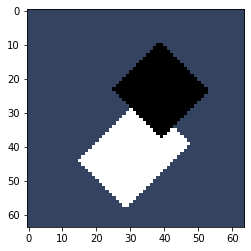

In [6]:
# Now plot the kth stimulus
k = 5
npimg = tt[k].numpy()
npimg = npimg / 2 + 0.5     # Convert amplitudes from [-1..1] into [0..1]
plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Make RGB dimension be last
plt.show()

In [266]:
# Take in RF center data from .npy files to position the stimuli
# Reading the .npy file
rfs_2 = np.load('n01_stat_conv2_mrf_4a.npy')  # Load stats for conv2 of alexnet
rfs_3 = np.load('n01_stat_conv3_mrf_4a.npy')  # Load stats for conv3 of alexnet
rfs_4 = np.load('n01_stat_conv4_mrf_4a.npy')  # Load stats for conv4 of alexnet
rfs_5 = np.load('n01_stat_conv5_mrf_4a.npy')  # Load stats for conv5 of alexnet

#load .npy files containing RF orientation information
rfs_2_stats = np.load('n01_stat_conv2_siz_1.npy')# Load size and orientation stats for conv2 r of alexnet
rfs_3_stats = np.load('n01_stat_conv3_siz_1.npy')# Load size and orientation stats for conv2 r of alexnet
rfs_4_stats = np.load('n01_stat_conv4_siz_1.npy')# Load size and orientation stats for conv2 r of alexnet
rfs_5_stats = np.load('n01_stat_conv5_siz_1.npy')# Load size and orientation stats for conv2 r of alexnet

#insert column of values delineating the layer (kernel) of each conv layer
rfs_2 = np.insert(rfs_2, 0, range(0, len(rfs_2)), axis=1)
rfs_3 = np.insert(rfs_3, 0, range(0, len(rfs_3)), axis=1)
rfs_4 = np.insert(rfs_4, 0, range(0, len(rfs_4)), axis=1)
rfs_5 = np.insert(rfs_5, 0, range(0, len(rfs_5)), axis=1)

#sort based on f_nat (descending order)
rfs_2_sorted = rfs_2[rfs_2[:,5].argsort()[::-1]]
rfs_3_sorted = rfs_3[rfs_3[:,5].argsort()[::-1]]
rfs_4_sorted = rfs_4[rfs_4[:,5].argsort()[::-1]]
rfs_5_sorted = rfs_5[rfs_5[:,5].argsort()[::-1]]

In [271]:
boolArr = (rfs_2[:,0] == 15)
idx = np.where(boolArr)
idx

(array([15]),)

In [244]:
#    0 - hi SF
#    4 - strong ori tuning, mid SF
#   21 - weak ori tuning, hi SF
#   24 - weak ori tuning, hi SF
#   33 - Very weak response
#   40 - *** good ori, medium SF    *** EXAMPLE
#   48 - ** mild ori, mid SF
#   50 - ** strong ori, hi SF
#   52 - weak response
#   60 - mild ori-tuning
#   75 - ** good ori tuning, hi SF
#   88 - hi SF
#   94 - * hi SF
#   98 - ** good ori, med SF
#  102 - ** good ori
#  124 - * some ori, hi SF
#  135 - *** Good ori, sf, size  ?
#  141 - ** good ori, hi SF
#  144 - ** good ori, hi SF
#  150 - * good ori, low resp.
#  153 - ** good ori, hi SF        *** EXAMPLE
#  154 - * good
#  155 - ** good ori, hi SF
#  167 - ** good ori, hi SF
#  168 - ** good ori, hi SF
#  179 - *** strong ori, med-hi SF  *** EXAMPLE
#  185 - ** good ori, hi SF
#  189 - *** strong tuning, mid SF

#generate image data set tailored to the RF of the top f_nat layers of conv2, conv3, conv4, conv5
keep_perc = 0.1 #percentile of layers to keep based on f_nat - ratio of R_max to the average of the top 10 responses to natural images
keep_rows = int(keep_perc*(rfs_2_sorted.shape[0]))
kept = rfs_2_sorted[:keep_rows,:]
stats = 
xn = 224
yn = 224
stim_dict = {}#dictionary to hold stimulus tensors specific to the top responding kernel layers as determined by f_nat
for i in range(0, len(kept)):
    kernel = int(kept[i, 0])#kernel of conv layer
    COM_0 = kept[i, 2]#center of mass (pix) along vertical image axis (center=0)
    COM_1 = kept[i, 2]#center of mass (pix) along horizontal image axis (center=0)
    RF_x = 111 + COM_0
    RF_y = 111 + COM_1
    ori = rfs_2_stats[kernel-1, 3]#get angle (orientation) in degrees of RF for this kernel layer
    angle = (ori*np.pi)/180
    
    stimuli = create_stim_set(RF_x, RF_y, xn, yn, size, angle)
    
    nstim = len(stimuli)

    d = np.empty((nstim,3,xn,yn), dtype='float32')

    k = 0
    for s in stimuli:
        d[k][0] = s#Red channel
        d[k][1] = d[k][0]   # Repeat same image in Green channel
        d[k][2] = d[k][0]   # Repeat same image in Blue channel
        k += 1

    tt = torch.tensor(d)
    #create transform to normalize images
    transform = transforms.Normalize([0.485, 0.456, 0.406], 
                              [0.229, 0.224, 0.225],  inplace=True)#
    for j in range(nstim):
        transform(tt[j,:,:,:])
    
    stim_dict[str(kernel)] = tt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


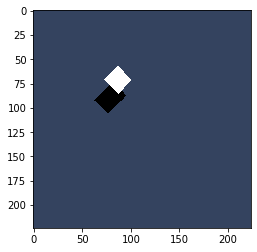

In [13]:
# Now plot the kth stimulus
loi = stim_dict.keys()
k = 6
tt = stim_dict[loi[0]]#grab a dictionary key and plot an example image
npimg = tt[k].numpy()
npimg = npimg / 2 + 0.5     # Convert amplitudes from [-1..1] into [0..1]
plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Make RGB dimension be last
plt.show()

In [261]:
#layer = 7 #get response from conv3
#layer = 9 #get response from conv4
#layer = 11 #get response from conv5

# Present the stimulus set to AlexNet, get responses from an early layer
layer = 4    # get responses from this layer (conv2)
response_dict = {}
for i in range(0, len(stim_dict.keys())):
    mod = models.alexnet(pretrained=True)
    kernel_key = list(stim_dict.keys())[i]
    kernel = int(kernel_key)
    imt =  stim_dict[kernel_key] #image set for given kernel transformed for AlexNet

    m = mod.features[:layer]
    r = m.forward(imt)
    
    max_inds = np.empty((8,2))#hold indices of maximum entries
    min_inds = np.empty((8,2))#hold indices of minimum entries
    maximums = np.empty((8))#hold maximum values
    averages = np.empty((8))#hold average values
    minimums = np.empty((8))#hold minimum values
    
    for j in range(8):#iterate over each image type
        a = r[j, kernel,:,:].cpu().detach().numpy()#extract data for given image and feature layer
        maximums[j] = np.amax(a)#find maximum value
        averages[j] = np.mean(a)#calculate average value
        minimums[j] = np.amin(a)#find minimum value

        ind_max = np.unravel_index(np.argmax(a, axis=None), a.shape)
        max_inds[j, 1], max_inds[j, 0] = ind_max[0], ind_max[1]
        ind_min = np.unravel_index(np.argmin(a, axis=None), a.shape)
        min_inds[j, 1], min_inds[j, 0] = ind_min[0], ind_min[1]
        
    response_dict[kernel_key] = [max_inds, min_inds, maximums, averages, minimums]

# im_ind = 1    # get responses for this stimulus image
# feature_channel_ind = 2   # get responses for this feature channel (z-depth)
# plt.imshow(r[im_ind, feature_channel_ind,:,:].cpu().detach()); # plot response
# plt.colorbar()
# plt.title('Output of layer ' + str(layer) + ' before rectification')
# plt.show()

torch.Size([8, 192, 27, 27])

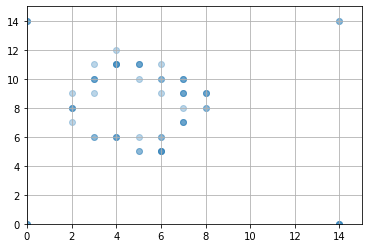

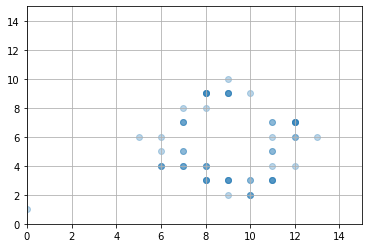

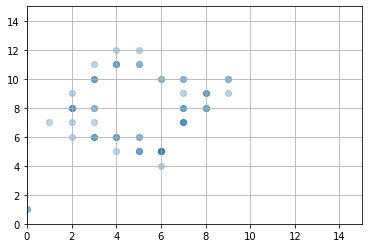

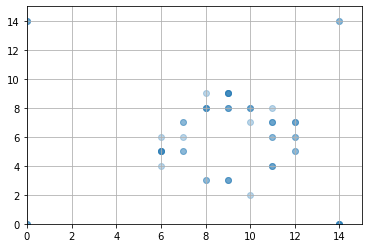

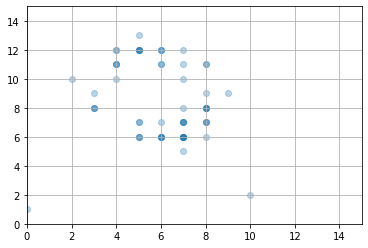

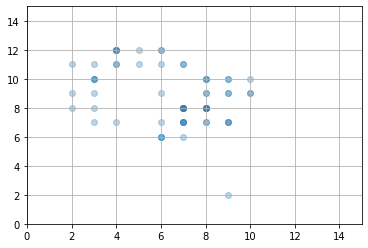

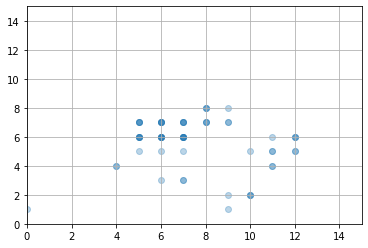

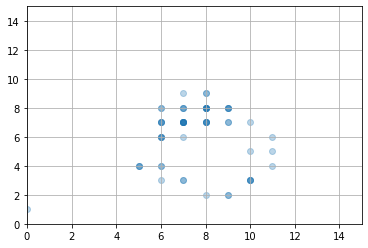

In [0]:
#plot where the max values occur spatially for each kernel
for j in range(8):#iterate over each image type
  fig, ax = plt.subplots()
  ax.scatter(max_inds[j, :, 0], max_inds[j, :, 1], alpha=0.3)
  ax.set_xlim(0, r.shape[2])
  ax.set_ylim(0, r.shape[3])
  ax.grid(True)
  plt.show()

In [0]:
#see if any feature layers respond differently to 1A and 1B, and/or 1C and 1D
#see if any feature layers respond differently to 2A and 2B, and/or 2C and 2D
BO_nodes = []
alpha = 0.55
for i in range(r.shape[1]):#iterate over each kernel (i.e. filter or feature layer)
  if np.abs(maximums[0, i] - maximums[1, i]) > alpha*np.abs(max(maximums[0, i], maximums[1, i])):#if the difference between maximum value fo 1A and 1B stimulus is larger than half the maximum value.. this is a border ownership feature layer
    BO_nodes.append([i, 1])
  if np.abs(maximums[2, i] - maximums[3, i]) > alpha*np.abs(max(maximums[2, i], maximums[3, i])):#if the difference between maximum value fo 1A and 1B stimulus is larger than half the maximum value.. this is a border ownership feature layer
    BO_nodes.append([i, 2])
  if np.abs(maximums[4, i] - maximums[5, i]) > alpha*np.abs(max(maximums[4, i], maximums[5, i])):#if the difference between maximum value fo 1A and 1B stimulus is larger than half the maximum value.. this is a border ownership feature layer
    BO_nodes.append([i, 3])
  if np.abs(maximums[6, i] - maximums[7, i]) > alpha*np.abs(max(maximums[6, i], maximums[7, i])):#if the difference between maximum value fo 1A and 1B stimulus is larger than half the maximum value.. this is a border ownership feature layer
    BO_nodes.append([i, 4])
BO_nodes

BO_nodes_av = []
alpha = 3
for i in range(r.shape[1]):#iterate over each kernel (i.e. filter or feature layer)
  if np.abs(averages[0, i] - averages[1, i]) > alpha*np.abs(max(averages[0, i], averages[1, i])):#if the difference between maximum value fo 1A and 1B stimulus is larger than half the maximum value.. this is a border ownership feature layer
    BO_nodes_av.append([i, 1])
  if np.abs(averages[2, i] - averages[3, i]) > alpha*np.abs(max(averages[2, i], averages[3, i])):#if the difference between maximum value fo 1A and 1B stimulus is larger than half the maximum value.. this is a border ownership feature layer
    BO_nodes_av.append([i, 2])
  if np.abs(averages[4, i] - averages[5, i]) > alpha*np.abs(max(averages[4, i], averages[5, i])):#if the difference between maximum value fo 1A and 1B stimulus is larger than half the maximum value.. this is a border ownership feature layer
    BO_nodes_av.append([i, 3])
  if np.abs(averages[6, i] - averages[7, i]) > alpha*np.abs(max(averages[6, i], averages[7, i])):#if the difference between maximum value fo 1A and 1B stimulus is larger than half the maximum value.. this is a border ownership feature layer
    BO_nodes_av.append([i, 4])
BO_nodes_av

[[13, 4],
 [15, 1],
 [15, 2],
 [24, 3],
 [24, 4],
 [25, 3],
 [25, 4],
 [30, 1],
 [30, 2],
 [30, 3],
 [30, 4],
 [34, 1],
 [34, 3],
 [41, 2],
 [41, 3],
 [47, 1],
 [47, 2],
 [47, 3],
 [47, 4],
 [52, 1],
 [52, 2],
 [54, 3],
 [55, 1],
 [55, 2],
 [62, 1],
 [62, 2],
 [63, 3]]

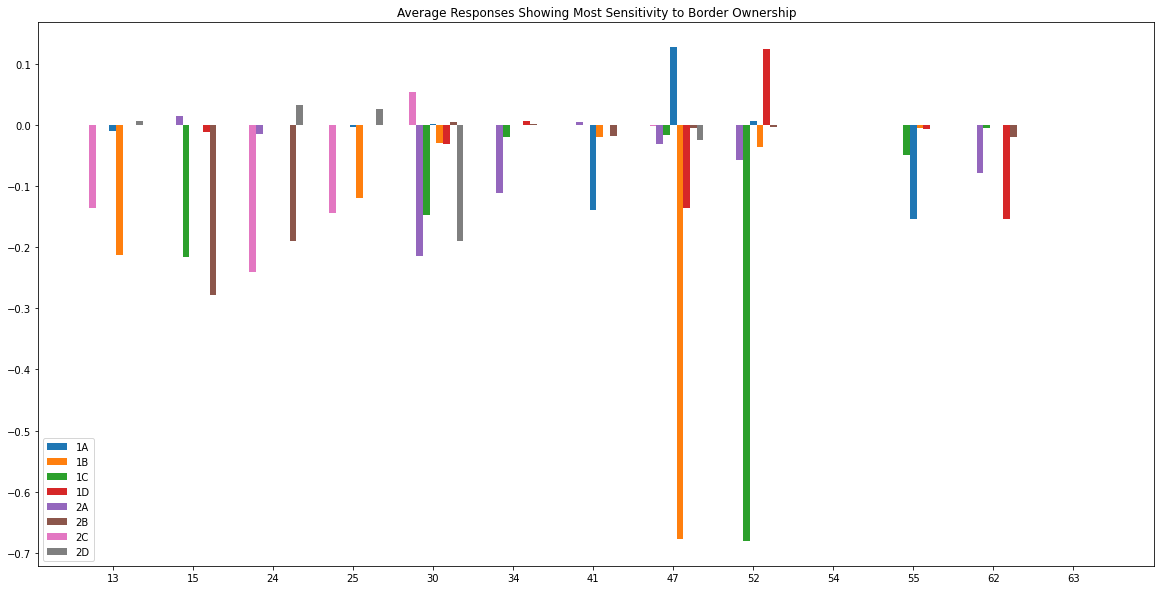

In [0]:

entries = []
for e in BO_nodes_av:
  entries.append(e[0])
myset = set(entries)
unique_entries = list(myset)

entries = []
valsToPlot = np.zeros((len(unique_entries), 8))
jj = 0
for i in range(0, len(BO_nodes_av)):
  entry = BO_nodes_av[i]
  if entry[1] == 1:
    plot1, plot2 = 0, 1
  elif entry[1] == 2:
    plot1, plot2 = 2, 3
  elif entry[1] == 3:
    plot1, plot2 = 4, 5
  else:
    plot1, plot2 = 6, 7
  if entry[0] in entries[0:i]:#if already encountered this feature layer it means it displayed border ownership sensitivity for other stimulus pairs
    jj = entries.index(entry[0])#finds index of the first time this entry appears
  else:
    entries.append(entry[0])
  valsToPlot[jj, plot1] = averages[plot1, entry[0]]
  valsToPlot[jj, plot2] = averages[plot2, entry[0]]

fig, ax = plt.subplots(figsize=(20,10))
ind = np.linspace(0, 50, num=len(entries))
width = 0.35         # the width of the bars
p1 = ax.bar(ind, valsToPlot[:, 0], width)
p2 = ax.bar(ind + width, valsToPlot[:, 1], width)
p3 = ax.bar(ind - width, valsToPlot[:, 2], width)
p4 = ax.bar(ind + 2*width, valsToPlot[:, 3], width)
p5 = ax.bar(ind - 2*width, valsToPlot[:, 4], width)
p6 = ax.bar(ind + 3*width, valsToPlot[:, 5], width)
p7 = ax.bar(ind - 3*width, valsToPlot[:, 6], width)
p8 = ax.bar(ind + 4*width, valsToPlot[:, 7], width)

ax.set_title('Average Responses Showing Most Sensitivity to Border Ownership')
ax.set_xticks(ind)
ax.set_xticklabels(entries)

ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0]), ('1A', '1B','1C', '1D','2A', '2B','2C', '2D'))
ax.autoscale_view()

plt.show()

fig, ax = plt.subplots(figsize=(20,10))
ind = np.linspace(0, 50, num=len(entries))
width = 0.35         # the width of the bars
p1 = ax.bar(ind, valsToPlot[:, 0], width)
p2 = ax.bar(ind + width, valsToPlot[:, 1], width)
p3 = ax.bar(ind - width, valsToPlot[:, 2], width)
p4 = ax.bar(ind + 2*width, valsToPlot[:, 3], width)
p5 = ax.bar(ind - 2*width, valsToPlot[:, 4], width)
p6 = ax.bar(ind + 3*width, valsToPlot[:, 5], width)
p7 = ax.bar(ind - 3*width, valsToPlot[:, 6], width)
p8 = ax.bar(ind + 4*width, valsToPlot[:, 7], width)

ax.set_title('Average Responses Showing Most Sensitivity to Border Ownership')
ax.set_xticks(ind)
ax.set_xticklabels(entries)

ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0]), ('1A', '1B','1C', '1D','2A', '2B','2C', '2D'))
ax.autoscale_view()

plt.show()

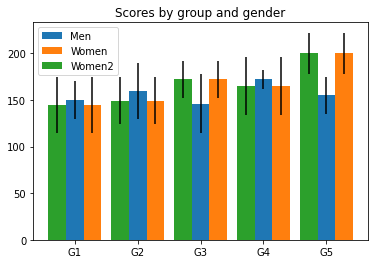

In [0]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (150, 160, 146, 172, 155)
menStd = (20, 30, 32, 10, 20)

fig, ax = plt.subplots()

#ind = np.arange(N)    # the x locations for the groups

width = 0.35         # the width of the bars
p1 = ax.bar(ind, menMeans, width, bottom=0, yerr=menStd)


womenMeans = (145, 149, 172, 165, 200)
womenStd = (30, 25, 20, 31, 22)
p2 = ax.bar(ind + width, womenMeans, width, bottom=0, yerr=womenStd)

womenMeans = (145, 149, 172, 165, 200)
womenStd = (30, 25, 20, 31, 22)
p3 = ax.bar(ind - width, womenMeans, width, bottom=0, yerr=womenStd)
ax.set_title('Scores by group and gender')
ax.set_xticks(ind )#+ width / 2)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((p1[0], p2[0], p3[0]), ('Men', 'Women', 'Women2'))
ax.autoscale_view()

plt.show()

In [0]:
valsToPlot.shape
len(unique_entries)

13

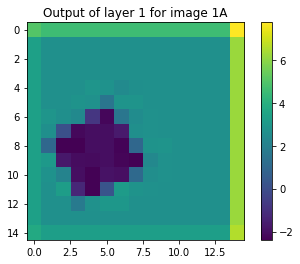

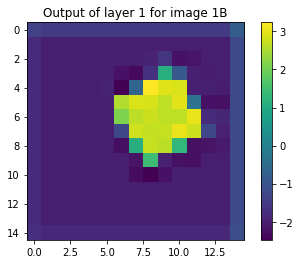

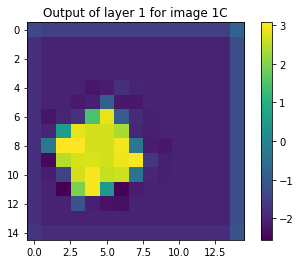

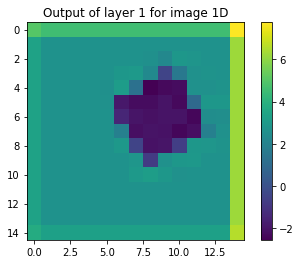

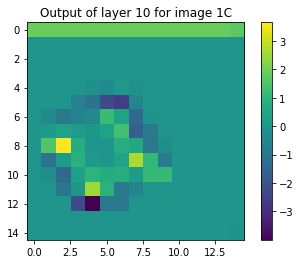

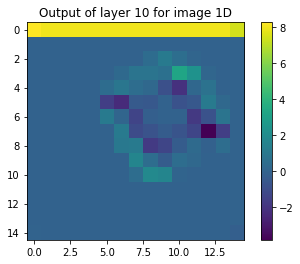

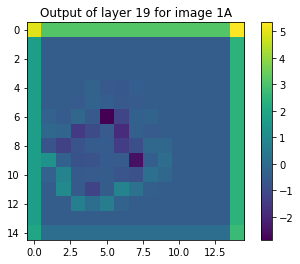

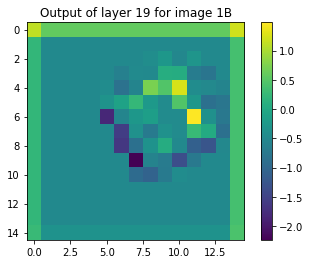

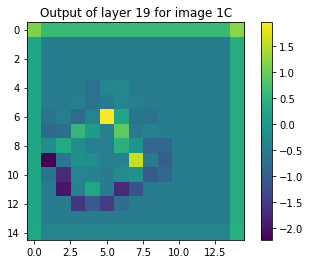

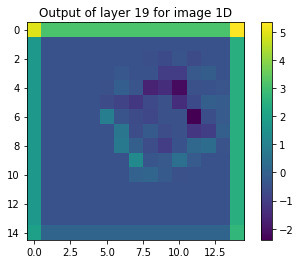

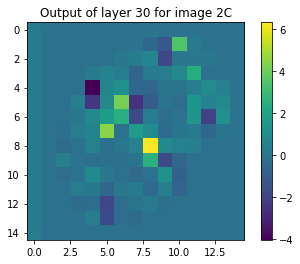

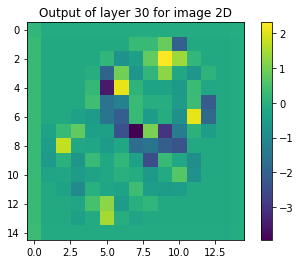

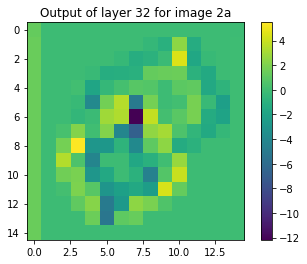

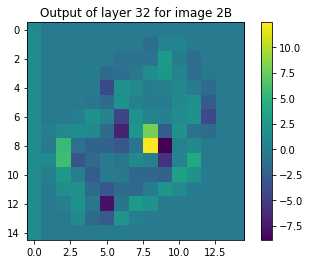

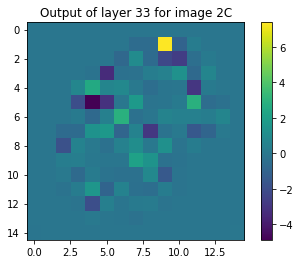

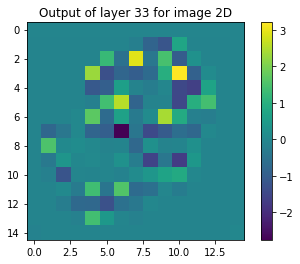

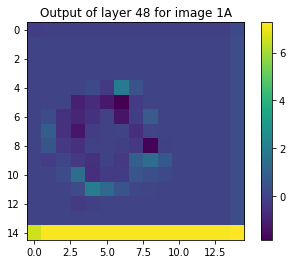

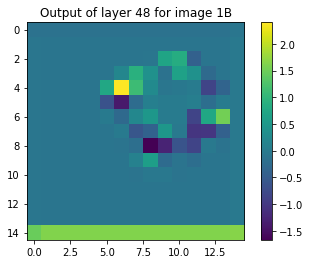

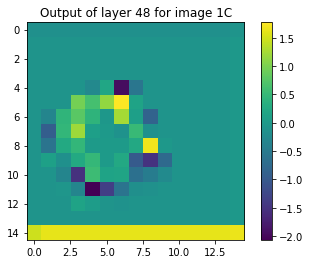

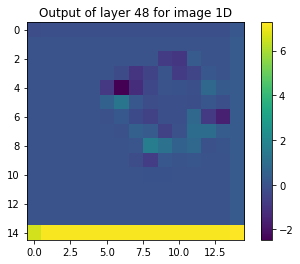

In [0]:
for i in range(0, len(BO_nodes)):
  entry = BO_nodes[i]
  if entry[1] == 1:
    title1,  title2 = '1A', '1B'
    plot1, plot2 = 0, 1
  elif entry[1] == 2:
    title1,  title2 = '1C', '1D'
    plot1, plot2 = 2, 3
  elif entry[1] == 3:
    title1,  title2 = '2a', '2B'
    plot1, plot2 = 4, 5
  else:
    title1,  title2 = '2C', '2D'
    plot1, plot2 = 6, 7
  plt.imshow(r[plot1, entry[0],:,:].cpu().detach()); # plot response
  plt.colorbar()
  plt.title('Output of layer ' + str(entry[0]) + ' for image ' + title1)
  plt.show()
  plt.imshow(r[plot2, entry[0],:,:].cpu().detach()); # plot response
  plt.colorbar()
  plt.title('Output of layer ' + str(entry[0]) + ' for image ' + title2)
  plt.show()

In [0]:
#after rectification
plt.figure()
layer = 2
mod = models.alexnet(pretrained=True)
m = mod.features[:layer]
r = m.forward(imt)
plt.imshow(r[0,0,:,:].cpu().detach());
plt.colorbar();
plt.title('Output of layer 1 after rectification');

In [0]:
unique_entries

[34, 41, 13, 15, 47, 52, 62, 54, 55, 24, 25, 30, 63]

In [56]:
a = rfs_2_sorted[:,4]
print(len(a[a < 0]))

c = rfs_3_sorted[:,4]
print(len(c[c < 0]))

d = rfs_4_sorted[:,4]
print(len(d[d < 0]))

e = rfs_5_sorted[:,4]
print(len(e[e < 0]))


1
7
6
16


<function matplotlib.pyplot.show(*args, **kw)>

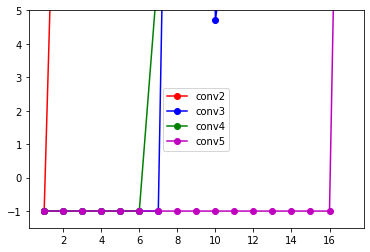

In [54]:
plt.plot(range(1,len(rfs_2_sorted[:15,4])+1),rfs_2_sorted[:15,4], 'ro-',label='conv2')
plt.plot(range(1,len(rfs_3_sorted[:15,4])+1),rfs_3_sorted[:15,4], 'bo-',label='conv3')
plt.plot(range(1,len(rfs_4_sorted[:15,4])+1),rfs_4_sorted[:15,4], 'go-',label='conv4')
plt.plot(range(1,len(rfs_5_sorted[:17,4])+1),rfs_5_sorted[:17,4], 'mo-',label='conv5')
plt.ylim((-1.5, 5))
plt.legend()
plt.show